In [1]:
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, Sequential
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()


print("x_train_shape", x_train.shape)
print("y_train_shape", y_train.shape)
print("x_test_shape", x_test.shape)
print("y_test_shape", y_test.shape)

x_train_shape (60000, 28, 28)
y_train_shape (60000,)
x_test_shape (10000, 28, 28)
y_test_shape (10000,)


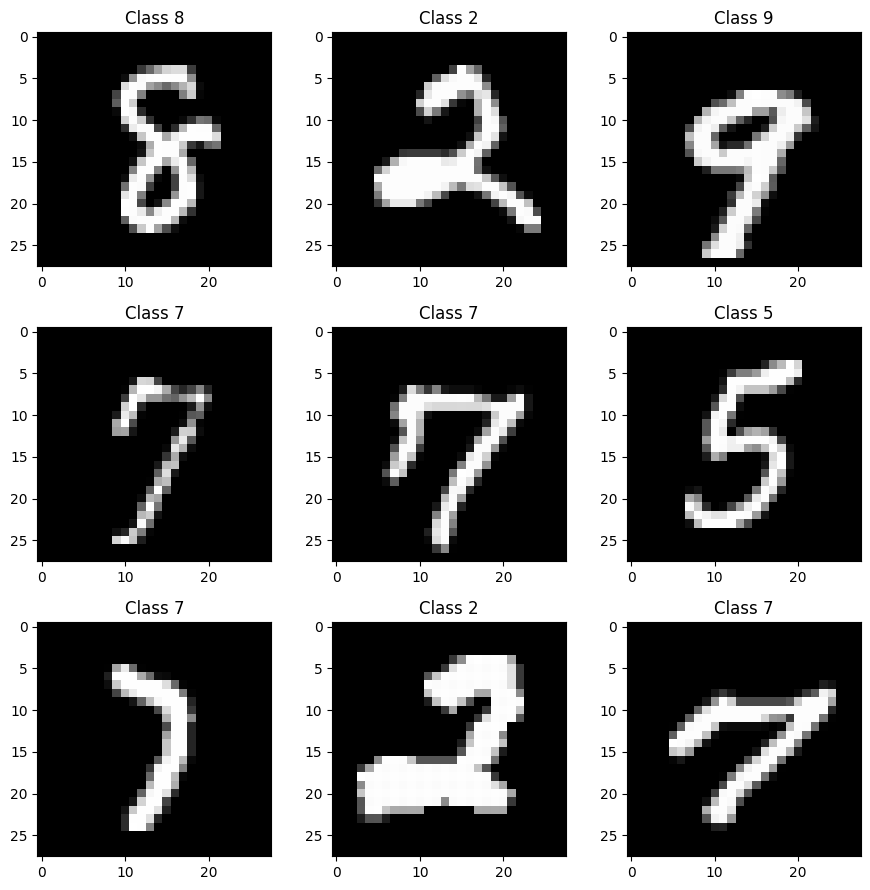

In [3]:
plt.rcParams['figure.figsize'] = (9,9)

for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(x_train))
    plt.imshow(x_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[num]))

plt.tight_layout()

In [8]:
x_train[0].shape
x_trains = x_train.reshape(60000, 784) # reshape 60,000 28 x 28 matrices into 60,000 784-length vectors.
x_train.shape

(60000, 28, 28)

In [5]:
def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")

matprint(x_train[num])

0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  
0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  
0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  
0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  
0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  
0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  
0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  
0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   31   19  0  0  0  


In [14]:
x_trains = x_train.reshape(60000, 784) # reshape 60,000 28 x 28 matrices into 60,000 784-length vectors.
x_tests = x_test.reshape(10000, 784)   # reshape 10,000 28 x 28 matrices into 10,000 784-length vectors.

x_trains = x_trains.astype('float32')   # change integers to 32-bit floating point numbers
x_tests = x_tests.astype('float32')

x_trains /= 255                        # normalize each value for each pixel for the entire vector for each input
x_tests /= 255

print("Training matrix shape", x_trains.shape)
print("Testing matrix shape", x_tests.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [40]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3),
activation='relu', input_shape=(28, 28, 1)))

model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3),
activation='relu'))

model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3),
activation='relu'))

model.add(layers.Flatten())

model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(10))

In [16]:
model.compile(optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True),

metrics=['accuracy'])


In [17]:
history = model.fit(x_trains.reshape(-1, 28, 28, 1),
y_train, epochs=10,
validation_data=(x_tests.reshape(-1, 28, 28, 1),
y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8930 - loss: 0.3413 - val_accuracy: 0.9854 - val_loss: 0.0469
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9852 - loss: 0.0487 - val_accuracy: 0.9892 - val_loss: 0.0355
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9900 - loss: 0.0322 - val_accuracy: 0.9893 - val_loss: 0.0348
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9916 - loss: 0.0251 - val_accuracy: 0.9902 - val_loss: 0.0315
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9933 - loss: 0.0207 - val_accuracy: 0.9875 - val_loss: 0.0378
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9959 - loss: 0.0126 - val_accuracy: 0.9928 - val_loss: 0.0245
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9955 - loss: 0.0127 - val_accuracy: 0.9892 - val_loss: 0.0503
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9962 - loss: 0.01

In [18]:
test_loss, test_acc = model.evaluate(
    x_tests.reshape(-1, 28, 28, 1), y_test, verbose=2)
print('Test accuracy:', test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.9916 - loss: 0.0378
Test accuracy: 0.991599977016449


In [38]:
from google.colab import drive
drive.mount('/content/drive')
model.save('/content/drive/My Drive/model.hdf5')
# model.save('/content/drive/My Drive/mon_modele')

Mounted at /content/drive


Give the index of the image in the range from 0 to 9999 to predict 
9999
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


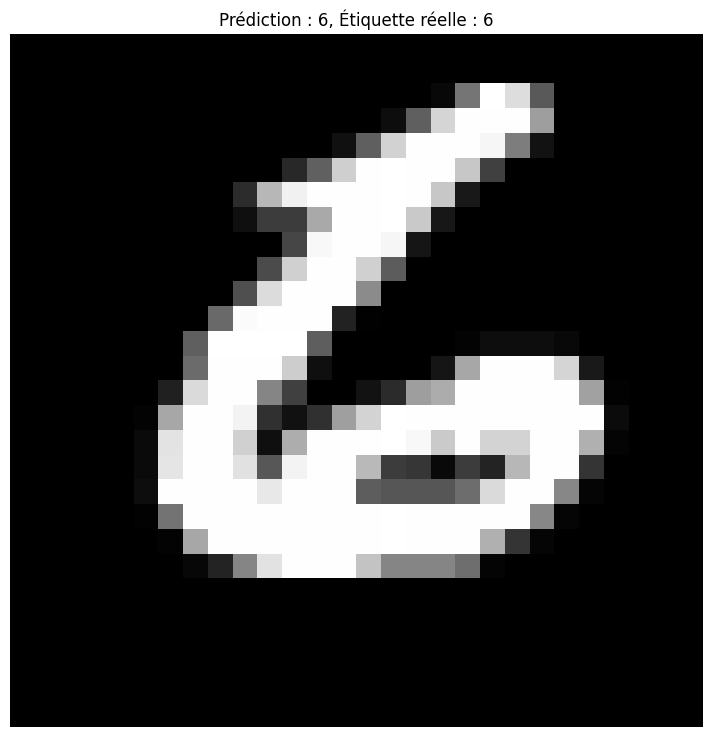

In [35]:
# Take an image from the test set (for example, the first image)
num = int(input('Give the index of the image in the range from 0 to 9999 to predict \n'))
img = x_test[num]
label = y_test[num]  # Obtenez l'étiquette réelle pour la comparaison


# Make predictions
predictions = model.predict(x_tests[num].reshape(-1, 28, 28, 1))
classe_predite = np.argmax(predictions, axis=1)

# Display the image and the prediction
plt.imshow(img, cmap='gray')  # Using the original image
plt.title(f"Prédiction : {classe_predite[0]}, Étiquette réelle : {label}")
plt.axis('off')
plt.show()

In [43]:
import sys
print(sys.version)

3.11.11 (main, Dec  4 2024, 08:55:07) [GCC 11.4.0]
